In [1]:
    from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json

with open('/content/drive/My Drive/deep_proj/images_info.json') as json_file:
    images_info = json.load(json_file)
with open('/content/drive/My Drive/deep_proj/labels.json') as json_file:
    labels_info = json.load(json_file)
with open('/content/drive/My Drive/deep_proj/categories_info.json') as json_file:
    categories_info = json.load(json_file)

In [0]:
#sort by id
labels_i = sorted(labels_info, key=lambda k: k.get('image_id', 0))
images_i = sorted(images_info, key=lambda k: k.get('id', 0))
categories_info = sorted(categories_info, key=lambda k: k.get('id', 0))

In [4]:
pip install pygame

     |████████████████████████████████| 11.4MB 2.7MB/s 


In [5]:
import io, pygame
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_number=5000
data_set=np.zeros([image_number,224,224,3],dtype='uint8')
file_path='/content/drive/My Drive/deep_proj/images.zip'

labels=[]
archive = zipfile.ZipFile(file_path, 'r')
ind=0
for index in range(image_number):
    imgdata = archive.read('val2017/'+images_i[index]['file_name'])
    if index % 500 ==0:
        print('data extracted: ',index)
    label_list=set()
    for ind in range(len(labels_i)):
        if images_i[index]['id'] == labels_i[ind]['image_id']:
            label_list.add(labels_i[ind]['category_id'])
    labels.append(list(label_list))

    # create a pygame-compatible file-like object from the bytes
    bytes_io = io.BytesIO(imgdata)
    img = pygame.image.load(bytes_io)
    imgg = pygame.surfarray.array3d(img)
    final=imgg.swapaxes(0,1)
    resized = cv2.resize(final, (224,224), interpolation = cv2.INTER_AREA)
    data_set[index,:,:,:] = resized

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
data extracted:  0
data extracted:  500
data extracted:  1000
data extracted:  1500
data extracted:  2000
data extracted:  2500
data extracted:  3000
data extracted:  3500
data extracted:  4000
data extracted:  4500


[64, 1, 67, 72, 78, 82, 84, 85, 86, 62]


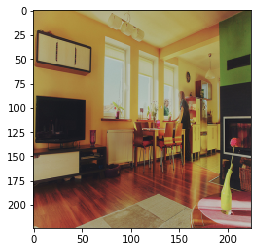

In [9]:
import matplotlib.pyplot as plt
plt.imshow(data_set[0])
print(labels[0])

In [0]:
#labels 
# label_id=[]
# for i in range(len(labels)):
#     label_name=[]
#     for j in range(len(labels[i])):
#         temp=labels[i][j]
#         if temp>len(categories_info):
#             temp=len(categories_info)-1
#         while categories_info[temp-1]['id'] != labels[i][j]:
#             temp=temp-1
#         label_name.append(categories_info[temp-1]['name'])
#     label_id.append(label_name)
    
# del label_name,labels_i,label_list
#we have labels(numerical) and label_id(strings)

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
multi_onehot=mlb.fit_transform(labels)

In [20]:
print(multi_onehot[0])
print(mlb.classes_)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 0]
[ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 27 28 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 67 70 72 73 74 75 76 77 78 79 80 81
 82 84 85 86 87 88 89 90]


[67, 44, 53, 54]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


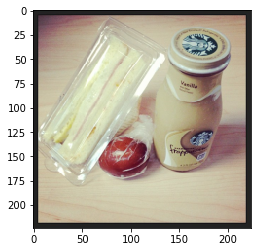

In [22]:
import matplotlib.pyplot as plt
import numpy as np
ni=1500
plt.imshow(data_set[ni])
print(labels[ni])
print(multi_onehot[ni])

In [0]:
#split train and test data
import numpy as np
import math
arr = np.arange(data_set.shape[0])
np.random.shuffle(arr)

m = data_set.shape[0]
test_size = int(math.floor(m*0.1))
train_size = m -test_size


train_data = data_set[arr[:train_size],:,:,:]
test_data = data_set[arr[train_size:],:,:,:]
train_label = multi_onehot[arr[:train_size]]
test_label = multi_onehot[arr[train_size:]]

del arr,

In [25]:
print('train size: ',train_data.shape[0])
print('test size: ',test_data.shape[0])
print('class Num: ',mlb.classes_.shape[0])

train size:  4500
test size:  500
class Num:  80


In [26]:
from keras.applications.mobilenet_v2 import MobileNetV2
#Load the VGG model
image_size=224
mobnet_conv = MobileNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

Using TensorFlow backend.













9412608/9406464 [==============================] - 0s 0us/step


In [0]:
# Freeze the layers 
for layer in mobnet_conv.layers:
    layer.trainable = False
 
# Check the trainable status of the individual layers
# for layer in mobnet_conv.layers:
#     print(layer, layer.trainable)

In [28]:
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizers import RMSprop,Adam
from keras import losses
 
class_number=mlb.classes_.shape[0]

# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(mobnet_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(class_number, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16056576  
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 80)                10320     
Total params: 18,357,776
Trainable params: 16,099,792
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
#--------preprocess data
import keras
train_data_preprocessed = keras.applications.xception.preprocess_input(train_data)
test_data_preprocessed = keras.applications.xception.preprocess_input(test_data)


In [30]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])
# Train the model
history = model.fit(train_data_preprocessed, train_label,
                    batch_size=64,
                    epochs=50,
                    validation_data=(test_data_preprocessed, test_label),
                    verbose=1)
score = model.evaluate(test_data_preprocessed, test_label, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4500 samples, validate on 500 samples
Epoch 1/50
4500/4500 [==============================] - 19s 4ms/step - loss: 0.4353 - acc: 0.8101 - val_loss: 0.3054 - val_acc: 0.9081
Epoch 2/50
4500/4500 [==============================] - 8s 2ms/step - loss: 0.2583 - acc: 0.9356 - val_loss: 0.2234 - val_acc: 0.9564
Epoch 3/50
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1950 - acc: 0.9641 - val_loss: 0.1868 - val_acc: 0.9653
Epoch 4/50
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1684 - acc: 0.9675 - val_loss: 0.1701 - val_acc: 0.9662
Epoch 5/50
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1510 - acc: 0.9689 - val_loss: 0.1571 - val_acc: 0.9665
Epoch 6/50
4500/4500 [==============================] - 8s 2ms/step - loss: 0.1353 - acc: 0.9700 - val_loss: 0.1454 - val_acc: 0.9669
Epoch 7/50
4500/4500 [============================

pridected labels: [ 1 81 37 77]
True labels:
1
43


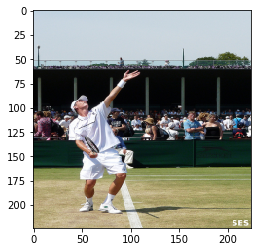

In [32]:
import matplotlib.pyplot as plt
img_num=2
img=train_data[img_num]
plt.imshow(img)
img=np.expand_dims(img,axis=0)
predicted_class=model.predict(img)

max_idxs=np.argsort(predicted_class)[0][::-1][:4]

print('pridected labels:',mlb.classes_[max_idxs] )
# for i in range(ca)
# cnt=0
# for i in predicted_class[0]:    
#     if i>((np.amax(predicted_class))/10):
#         print(mlb.classes_[cnt])
#     cnt+=1  
# max_index=np.where(predicted_class==np.amax(predicted_class))
# aa=max_idxs[0][75:80]
# aa=np.flip(aa)
# print('predicted labels: ',mlb.classes_[aa] )

print('True labels:') 
cnt=0
for i in train_label[img_num]:    
    if i==1:
        print(mlb.classes_[cnt])
    cnt+=1 

In [0]:
model.save('drive/My Drive/deep_proj/cnn_multi_label.h5')

In [0]:
np.save('drive/My Drive/deep_proj/classes_',mlb.classes_)